<h1><center>Inteligencia Artificial</center></h1>


<h2><center>Tarea 1 - Recorriendo Laberintos</center></h2>

---

#### El **objetivo** de esta tarea será que describan cada función definida en los siguientes códigos. 

* De la misma forma, que puedan realizar una descripción de **cómo** funcionan los algoritmos implementados.

* Encontrarán diversos códigos y su trabajo será la descripción de cada uno de ellos y su funcionamiento, como bien se menciona arriba.

* Además, deberán agregar su informacción correspondiente del equipo que hayan formado, así como el link de github correspondiente al cual cargarán la notebook (ejecutada previamente), para visualizar las respuestas.

---
---

### Aquí sus nombres, matrícula, carrera, semestre

--- 
### Aqui el link al github (ya sea uno por equipo o el individual

---
---

---
Recuerden siempre importar las librerías pertinentes :)

---

In [1]:
import heapq
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Explica de manera simple, el algoritmo de Dijkstra

In [2]:
class Vertex:
    def __init__(self,x_coord,y_coord):
        self.x=x_coord
        self.y=y_coord
        self.d=float('inf') #distance from source
        self.parent_x=None
        self.parent_y=None
        self.processed=False
        self.index_in_queue=None

def get_neighbors(mat,r,c):
    shape=mat.shape
    neighbors=[]
    #ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed:
         neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed:
            neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed:
            neighbors.append(mat[r][c+1])
    return neighbors

def bubble_up(queue, index):
    if index <= 0:
        return queue
    p_index=(index-1)//2
    if queue[index].d < queue[p_index].d:
            queue[index], queue[p_index]=queue[p_index], queue[index]
            queue[index].index_in_queue=index
            queue[p_index].index_in_queue=p_index
            quque = bubble_up(queue, p_index)
    return queue
    
def bubble_down(queue, index):
    length=len(queue)
    lc_index=2*index+1
    rc_index=lc_index+1
    if lc_index >= length:
        return queue
    if lc_index < length and rc_index >= length: 
        if queue[index].d > queue[lc_index].d:
            queue[index], queue[lc_index]=queue[lc_index], queue[index]
            queue[index].index_in_queue=index
            queue[lc_index].index_in_queue=lc_index
            queue = bubble_down(queue, lc_index)
    else:
        small = lc_index
        if queue[lc_index].d > queue[rc_index].d:
            small = rc_index
        if queue[small].d < queue[index].d:
            queue[index],queue[small]=queue[small],queue[index]
            queue[index].index_in_queue=index
            queue[small].index_in_queue=small
            queue = bubble_down(queue, small)
    return queue

def get_distance(img,u,v):
    return 0.1 + (float(img[v][0])-float(img[u][0]))**2+(float(img[v][1])-float(img[u][1]))**2+(float(img[v][2])-float(img[u][2]))**2

def drawPath(img,path, thickness=2):
    x0,y0=path[0]
    for vertex in path[1:]:
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(255,0,0),thickness)
        x0,y0=vertex

In [3]:
def find_shortest_path(img,src,dst):
    pq=[]
    source_x=src[0]
    source_y=src[1]
    dest_x=dst[0]
    dest_y=dst[1]
    imagerows,imagecols=img.shape[0],img.shape[1]
    matrix = np.full((imagerows, imagecols), None) 
    for r in range(imagerows):
        for c in range(imagecols):
            matrix[r][c]=Vertex(c,r)
            matrix[r][c].index_in_queue=len(pq)
            pq.append(matrix[r][c]) 
    
    matrix[source_y][source_x].d=0
    pq=bubble_up(pq, matrix[source_y][source_x].index_in_queue)
    

    while len(pq) > 0:
        
        u=pq[0]
        u.processed=True
        pq[0]=pq[-1]
        pq[0].index_in_queue=0 
        pq.pop()
        pq=bubble_down(pq,0)
        neighbors = get_neighbors(matrix,u.y,u.x) 
        for v in neighbors:
            dist=get_distance(img,(u.y,u.x),(v.y,v.x)) 
            if u.d + dist < v.d: 
                v.d = u.d+dist
                v.parent_x=u.x
                v.parent_y=u.y
                idx=v.index_in_queue
                pq=bubble_down(pq,idx)
                pq=bubble_up(pq,idx)
                          
    path=[]
    iter_v=matrix[dest_y][dest_x] 
    path.append((dest_x,dest_y))

    while(iter_v.y!=source_y or iter_v.x!=source_x):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.parent_y][iter_v.parent_x]

    path.append((source_x,source_y))
    return path

### Deberán cargar el mapa y posicionar las coordenadas de inicio y fin. En el siguiente ejemplo se muestra la forma de carga, pero ustedes deberán completar las líneas correspondientes de código

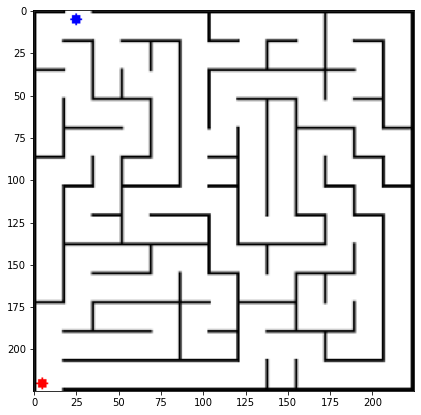

In [4]:
#Ejemplo
img = cv2.imread('maze1.png') # read the image 
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (25,5), 3, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img)  
plt.show()

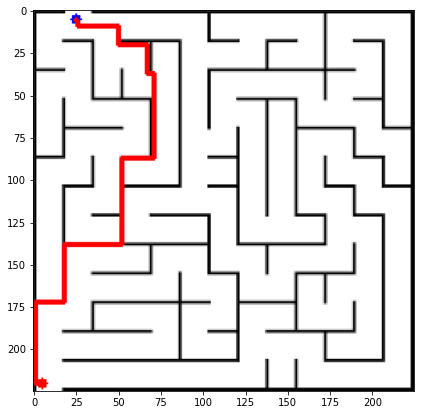

In [5]:
#En este bolque deberán mandar a llamar las clases correspondientes para encontrar el camino más corto, 
#mandando como parámetros la imagen y las coordenadas de los 2 círculos azul (inicio) y rojo (fin)
#y dibujar el path correspondiente

#Aqui su código

drawPath(img,find_shortest_path(img,(5,220),(25,5)))

plt.figure(figsize=(7,7))
plt.imshow(img)
plt.show()

### Hacer lo mismo para las 2 siguientes imágenes llamadas: maze2.png y maze3.png

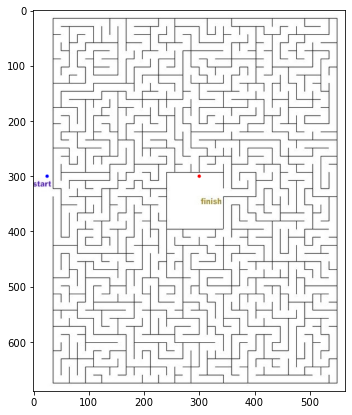

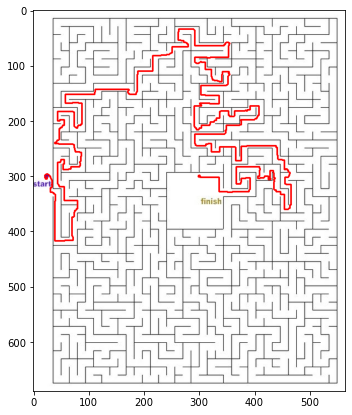

In [6]:
#Aqui su código
img = cv2.imread('maze2.png') # read the image 
cv2.circle(img,(300,300), 3, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (25,300), 3, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img)  
plt.show()

drawPath(img,find_shortest_path(img,(300,300),(25,300)))

plt.figure(figsize=(7,7))
plt.imshow(img)
plt.show()

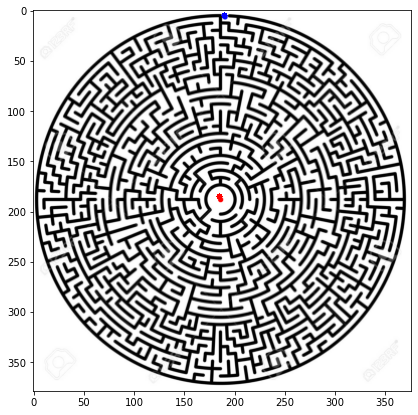

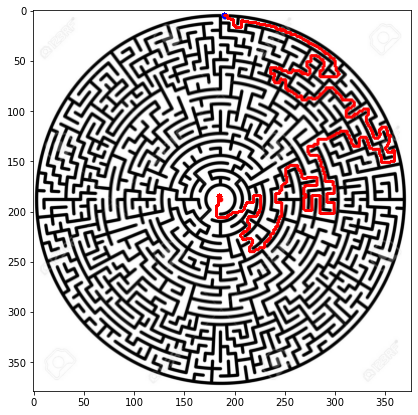

In [7]:
#Aqui su código
img = cv2.imread('maze3.png') # read the image 
cv2.circle(img,(185,185), 3, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (190,5), 3, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img)  
plt.show()

drawPath(img,find_shortest_path(img,(185,185),(190,5)))

plt.figure(figsize=(7,7))
plt.imshow(img)
plt.show()

---
---

### A continuación se muestran otros códigos, donde deberán realizar el mismo proceso.

* Analizar código
* Completar código faltante
* Mostrar la solución para 2 algoritmos de los que se implementan a continuación
* Explicar su funcionamiento

# Cell!

In [8]:
class Cell(object):
    """Class for representing a cell in a 2D grid.
        Attributes:
            row (int): The row that this cell belongs to
            col (int): The column that this cell belongs to
            visited (bool): True if this cell has been visited by an algorithm
            active (bool):
            is_entry_exit (bool): True when the cell is the beginning or end of the maze
            walls (list):
            neighbours (list):
    """
    def __init__(self, row, col):
        self.row = row
        self.col = col
        self.visited = False
        self.active = False
        self.is_entry_exit = None
        self.walls = {"top": True, "right": True, "bottom": True, "left": True}
        self.neighbours = list()

    def is_walls_between(self, neighbour):
        if self.row - neighbour.row == 1 and self.walls["top"] and neighbour.walls["bottom"]:
            return True
        elif self.row - neighbour.row == -1 and self.walls["bottom"] and neighbour.walls["top"]:
            return True
        elif self.col - neighbour.col == 1 and self.walls["left"] and neighbour.walls["right"]:
            return True
        elif self.col - neighbour.col == -1 and self.walls["right"] and neighbour.walls["left"]:
            return True

        return False

    def remove_walls(self, neighbour_row, neighbour_col):
        if self.row - neighbour_row == 1:
            self.walls["top"] = False
            return True, ""
        elif self.row - neighbour_row == -1:
            self.walls["bottom"] = False
            return True, ""
        elif self.col - neighbour_col == 1:
            self.walls["left"] = False
            return True, ""
        elif self.col - neighbour_col == -1:
            self.walls["right"] = False
            return True, ""
        return False

    def set_as_entry_exit(self, entry_exit, row_limit, col_limit):
        if self.row == 0:
            self.walls["top"] = False
        elif self.row == row_limit:
            self.walls["bottom"] = False
        elif self.col == 0:
            self.walls["left"] = False
        elif self.col == col_limit:
            self.walls["right"] = False

        self.is_entry_exit = entry_exit

# Maze!

In [9]:
import random
import math
import time

class Maze(object):
    def __init__(self, num_rows, num_cols, id=0):
        self.num_cols = num_cols
        self.num_rows = num_rows
        self.id = id
        self.grid_size = num_rows*num_cols
        self.entry_coor = self._pick_random_entry_exit(None)
        self.exit_coor = self._pick_random_entry_exit(self.entry_coor)
        self.generation_path = []
        self.solution_path = None
        self.initial_grid = self.generate_grid()
        self.grid = self.initial_grid
        self.generate_maze((0, 0))

    def generate_grid(self):
        grid = list()

        for i in range(self.num_rows):
            grid.append(list())

            for j in range(self.num_cols):
                grid[i].append(Cell(i, j))

        return grid

    def find_neighbours(self, cell_row, cell_col):
        neighbours = list()

        def check_neighbour(row, col):
            if row >= 0 and row < self.num_rows and col >= 0 and col < self.num_cols:
                neighbours.append((row, col))

        check_neighbour(cell_row-1, cell_col)     # Top neighbour
        check_neighbour(cell_row, cell_col+1)     # Right neighbour
        check_neighbour(cell_row+1, cell_col)     # Bottom neighbour
        check_neighbour(cell_row, cell_col-1)     # Left neighbour

        if len(neighbours) > 0:
            return neighbours

        else:
            return None     # None if no unvisited neighbours found

    def _validate_neighbours_generate(self, neighbour_indices):
        neigh_list = [n for n in neighbour_indices if not self.grid[n[0]][n[1]].visited]

        if len(neigh_list) > 0:
            return neigh_list
        else:
            return None

    def validate_neighbours_solve(self, neighbour_indices, k, l, k_end, l_end, method = "fancy"):
        if method == "fancy":
            neigh_list = list()
            min_dist_to_target = 100000

            for k_n, l_n in neighbour_indices:
                if (not self.grid[k_n][l_n].visited
                        and not self.grid[k][l].is_walls_between(self.grid[k_n][l_n])):
                    dist_to_target = math.sqrt((k_n - k_end) ** 2 + (l_n - l_end) ** 2)

                    if (dist_to_target < min_dist_to_target):
                        min_dist_to_target = dist_to_target
                        min_neigh = (k_n, l_n)

            if "min_neigh" in locals():
                neigh_list.append(min_neigh)

        elif method == "brute-force":
            neigh_list = [n for n in neighbour_indices if not self.grid[n[0]][n[1]].visited
                          and not self.grid[k][l].is_walls_between(self.grid[n[0]][n[1]])]

        if len(neigh_list) > 0:
            return neigh_list
        else:
            return None

    def _pick_random_entry_exit(self, used_entry_exit=None):
        rng_entry_exit = used_entry_exit    # Initialize with used value

        # Try until unused location along boundary is found.
        while rng_entry_exit == used_entry_exit:
            rng_side = random.randint(0, 3)

            if (rng_side == 0):     # Top side
                rng_entry_exit = (0, random.randint(0, self.num_cols-1))

            elif (rng_side == 2):   # Right side
                rng_entry_exit = (self.num_rows-1, random.randint(0, self.num_cols-1))

            elif (rng_side == 1):   # Bottom side
                rng_entry_exit = (random.randint(0, self.num_rows-1), self.num_cols-1)

            elif (rng_side == 3):   # Left side
                rng_entry_exit = (random.randint(0, self.num_rows-1), 0)

        return rng_entry_exit       # Return entry/exit that is different from exit/entry

    def generate_maze(self, start_coor = (0, 0)):
        k_curr, l_curr = start_coor             # Where to start generating
        path = [(k_curr, l_curr)]               # To track path of solution
        self.grid[k_curr][l_curr].visited = True     # Set initial cell to visited
        visit_counter = 1                       # To count number of visited cells
        visited_cells = list()                  # Stack of visited cells for backtracking

        print("\nGenerating the maze with depth-first search...")
        time_start = time.process_time()

        while visit_counter < self.grid_size:     # While there are unvisited cells
            neighbour_indices = self.find_neighbours(k_curr, l_curr)    # Find neighbour indicies
            neighbour_indices = self._validate_neighbours_generate(neighbour_indices)

            if neighbour_indices is not None:   # If there are unvisited neighbour cells
                visited_cells.append((k_curr, l_curr))              # Add current cell to stack
                k_next, l_next = random.choice(neighbour_indices)     # Choose random neighbour
                self.grid[k_curr][l_curr].remove_walls(k_next, l_next)   # Remove walls between neighbours
                self.grid[k_next][l_next].remove_walls(k_curr, l_curr)   # Remove walls between neighbours
                self.grid[k_next][l_next].visited = True                 # Move to that neighbour
                k_curr = k_next
                l_curr = l_next
                path.append((k_curr, l_curr))   # Add coordinates to part of generation path
                visit_counter += 1

            elif len(visited_cells) > 0:  # If there are no unvisited neighbour cells
                k_curr, l_curr = visited_cells.pop()      # Pop previous visited cell (backtracking)
                path.append((k_curr, l_curr))   # Add coordinates to part of generation path

        print("Number of moves performed: {}".format(len(path)))
        print("Execution time for algorithm: {:.4f}".format(time.process_time() - time_start))

        self.grid[self.entry_coor[0]][self.entry_coor[1]].set_as_entry_exit("entry",
            self.num_rows-1, self.num_cols-1)
        self.grid[self.exit_coor[0]][self.exit_coor[1]].set_as_entry_exit("exit",
            self.num_rows-1, self.num_cols-1)

        for i in range(self.num_rows):
            for j in range(self.num_cols):
                self.grid[i][j].visited = False      # Set all cells to unvisited before returning grid

        self.generation_path = path

# Solver

In [10]:
import time
import random
import logging

logging.basicConfig(level=logging.DEBUG)


class Solver(object):
    def __init__(self, maze, quiet_mode, neighbor_method):
        logging.debug("Class Solver ctor called")

        self.maze = maze
        self.neighbor_method = neighbor_method
        self.name = ""
        self.quiet_mode = quiet_mode

    def solve(self):
        logging.debug('Class: Solver solve called')
        raise NotImplementedError

    def get_name(self):
        logging.debug('Class Solver get_name called')
        raise self.name

    def get_path(self):
        logging.debug('Class Solver get_path called')
        return self.path


class BreadthFirst(Solver):

    def __init__(self, maze, quiet_mode=False, neighbor_method="fancy"):
        logging.debug('Class BreadthFirst ctor called')

        self.name = "Breadth First Recursive"
        super().__init__(maze, neighbor_method, quiet_mode)

    def solve(self):
        logging.debug("Class BreadthFirst solve called")
        current_level = [self.maze.entry_coor]
        path = list()

        print("\nSolving the maze with breadth-first search...")
        time_start = time.process_time()

        while True:
            next_level = list()

            while current_level:
                k_curr, l_curr = current_level.pop(0)
                self.maze.grid[k_curr][l_curr].visited = True  
                path.append(((k_curr, l_curr), False))
                if (k_curr, l_curr) == self.maze.exit_coor:
                    if not self.quiet_mode:
                        print("Number of moves performed: {}".format(len(path)))
                        print("Execution time for algorithm: {:.4f}".format(time.process_time() - time_start))
                    return path

                neighbour_coors = self.maze.find_neighbours(k_curr, l_curr)  # Find neighbour indicies
                neighbour_coors = self.maze.validate_neighbours_solve(neighbour_coors, k_curr,
                                                                  l_curr, self.maze.exit_coor[0],
                                                                  self.maze.exit_coor[1], self.neighbor_method)

                if neighbour_coors is not None:
                    for coor in neighbour_coors:
                        next_level.append(coor)

            for cell in next_level:
                current_level.append(cell)
        logging.debug("Class BreadthFirst leaving solve")


class BiDirectional(Solver):
    def __init__(self, maze, quiet_mode=False, neighbor_method="fancy"):
        logging.debug('Class BiDirectional ctor called')

        super().__init__(maze, neighbor_method, quiet_mode)
        self.name = "Bi Directional"

    def solve(self):
        logging.debug("Class BiDirectional solve called")

        grid = self.maze.grid
        k_curr, l_curr = self.maze.entry_coor           
        p_curr, q_curr = self.maze.exit_coor            
        grid[k_curr][l_curr].visited = True   
        grid[p_curr][q_curr].visited = True   
        backtrack_kl = list()                 
        backtrack_pq = list()                  
        path_kl = list()                       
        path_pq = list()                      

        if not self.quiet_mode:
            print("\nSolving the maze with bidirectional depth-first search...")
        time_start = time.process_time()

        while True:   
            neighbours_kl = self.maze.find_neighbours(k_curr, l_curr)    
            real_neighbours_kl = [neigh for neigh in neighbours_kl if not grid[k_curr][l_curr].is_walls_between(grid[neigh[0]][neigh[1]])]
            neighbours_kl = [neigh for neigh in real_neighbours_kl if not grid[neigh[0]][neigh[1]].visited]

            neighbours_pq = self.maze.find_neighbours(p_curr, q_curr) 
            real_neighbours_pq = [neigh for neigh in neighbours_pq if not grid[p_curr][q_curr].is_walls_between(grid[neigh[0]][neigh[1]])]
            neighbours_pq = [neigh for neigh in real_neighbours_pq if not grid[neigh[0]][neigh[1]].visited]

            if len(neighbours_kl) > 0:  
                backtrack_kl.append((k_curr, l_curr))             
                path_kl.append(((k_curr, l_curr), False))         
                k_next, l_next = random.choice(neighbours_kl)      
                grid[k_next][l_next].visited = True               
                k_curr = k_next
                l_curr = l_next

            elif len(backtrack_kl) > 0:                 
                path_kl.append(((k_curr, l_curr), True))   
                k_curr, l_curr = backtrack_kl.pop()      

            if len(neighbours_pq) > 0:                        
                backtrack_pq.append((p_curr, q_curr))           
                path_pq.append(((p_curr, q_curr), False))       
                p_next, q_next = random.choice(neighbours_pq)   
                grid[p_next][q_next].visited = True             
                p_curr = p_next
                q_curr = q_next

            elif len(backtrack_pq) > 0:                  
                path_pq.append(((p_curr, q_curr), True))   
                p_curr, q_curr = backtrack_pq.pop()        


            if any((True for n_kl in real_neighbours_kl if (n_kl, False) in path_pq)):
                path_kl.append(((k_curr, l_curr), False))
                path = [p_el for p_tuple in zip(path_kl, path_pq) for p_el in p_tuple]
                if not self.quiet_mode:
                    print("Number of moves performed: {}".format(len(path)))
                    print("Execution time for algorithm: {:.4f}".format(time.process_time() - time_start))
                logging.debug("Class BiDirectional leaving solve")
                return path


            elif any((True for n_pq in real_neighbours_pq if (n_pq, False) in path_kl)):
                path_pq.append(((p_curr, q_curr), False))
                path = [p_el for p_tuple in zip(path_kl, path_pq) for p_el in p_tuple] 
                if not self.quiet_mode:
                    print("Number of moves performed: {}".format(len(path)))
                    print("Execution time for algorithm: {:.4f}".format(time.process_time() - time_start))
                logging.debug("Class BiDirectional leaving solve")
                return path


class DepthFirstBacktracker(Solver):
    def __init__(self, maze, quiet_mode=False,  neighbor_method="fancy"):
        logging.debug('Class DepthFirstBacktracker ctor called')

        super().__init__(maze, neighbor_method, quiet_mode)
        self.name = "Depth First Backtracker"

    def solve(self):
        logging.debug("Class DepthFirstBacktracker solve called")
        k_curr, l_curr = self.maze.entry_coor      
        self.maze.grid[k_curr][l_curr].visited = True     
        visited_cells = list()                  
        path = list()                           
        if not self.quiet_mode:
            print("\nSolving the maze with depth-first search...")

        time_start = time.process_time()

        while (k_curr, l_curr) != self.maze.exit_coor:    
            neighbour_indices = self.maze.find_neighbours(k_curr, l_curr)   
            neighbour_indices = self.maze.validate_neighbours_solve(neighbour_indices, k_curr,
                l_curr, self.maze.exit_coor[0], self.maze.exit_coor[1], self.neighbor_method)

            if neighbour_indices is not None: 
                visited_cells.append((k_curr, l_curr))             
                path.append(((k_curr, l_curr), False))  
                k_next, l_next = random.choice(neighbour_indices)   
                self.maze.grid[k_next][l_next].visited = True                 
                k_curr = k_next
                l_curr = l_next

            elif len(visited_cells) > 0:           
                path.append(((k_curr, l_curr), True))  
                k_curr, l_curr = visited_cells.pop()  

        path.append(((k_curr, l_curr), False))
        if not self.quiet_mode:
            print("Number of moves performed: {}".format(len(path)))
            print("Execution time for algorithm: {:.4f}".format(time.process_time() - time_start))

        logging.debug('Class DepthFirstBacktracker leaving solve')
        return path

# Viz

In [11]:
import matplotlib.pyplot as plt
from matplotlib import animation
import logging

logging.basicConfig(level=logging.DEBUG)
logging.getLogger('matplotlib.font_manager').disabled = True

class Visualizer(object):
    def __init__(self, maze, cell_size, media_filename):
        self.maze = maze
        self.cell_size = cell_size
        self.height = maze.num_rows * cell_size
        self.width = maze.num_cols * cell_size
        self.ax = None
        self.lines = dict()
        self.squares = dict()
        self.media_filename = media_filename

    def set_media_filename(self, filename):
        self.media_filename = filename

    def show_maze(self):
        # Create the plot figure and style the axes
        fig = self.configure_plot()

        # Plot the walls on the figure
        self.plot_walls()

        # Display the plot to the user
        plt.show()

        # Handle any potential saving
        if self.media_filename:
            fig.savefig("{}{}.png".format(self.media_filename, "_generation"), frameon=None)

    def plot_walls(self):
        for i in range(self.maze.num_rows):
            for j in range(self.maze.num_cols):
                if self.maze.initial_grid[i][j].is_entry_exit == "entry":
                    self.ax.text(j*self.cell_size, i*self.cell_size, "START", fontsize=7, weight="bold")
                elif self.maze.initial_grid[i][j].is_entry_exit == "exit":
                    self.ax.text(j*self.cell_size, i*self.cell_size, "END", fontsize=7, weight="bold")
                if self.maze.initial_grid[i][j].walls["top"]:
                    self.ax.plot([j*self.cell_size, (j+1)*self.cell_size],
                                 [i*self.cell_size, i*self.cell_size], color="k")
                if self.maze.initial_grid[i][j].walls["right"]:
                    self.ax.plot([(j+1)*self.cell_size, (j+1)*self.cell_size],
                                 [i*self.cell_size, (i+1)*self.cell_size], color="k")
                if self.maze.initial_grid[i][j].walls["bottom"]:
                    self.ax.plot([(j+1)*self.cell_size, j*self.cell_size],
                                 [(i+1)*self.cell_size, (i+1)*self.cell_size], color="k")
                if self.maze.initial_grid[i][j].walls["left"]:
                    self.ax.plot([j*self.cell_size, j*self.cell_size],
                                 [(i+1)*self.cell_size, i*self.cell_size], color="k")

    def configure_plot(self):
        # Create the plot figure
        fig = plt.figure(figsize = (7, 7*self.maze.num_rows/self.maze.num_cols))

        # Create the axes
        self.ax = plt.axes()

        # Set an equal aspect ratio
        self.ax.set_aspect("equal")

        # Remove the axes from the figure
        self.ax.axes.get_xaxis().set_visible(False)
        self.ax.axes.get_yaxis().set_visible(False)

        title_box = self.ax.text(0, self.maze.num_rows + self.cell_size + 0.1,
                            r"{}$\times${}".format(self.maze.num_rows, self.maze.num_cols),
                            bbox={"facecolor": "gray", "alpha": 0.5, "pad": 4}, fontname="serif", fontsize=15)

        return fig

    def show_maze_solution(self):
        # Create the figure and style the axes
        fig = self.configure_plot()

        # Plot the walls onto the figure
        self.plot_walls()

        list_of_backtrackers = [path_element[0] for path_element in self.maze.solution_path if path_element[1]]

        # Keeps track of how many circles have been drawn
        circle_num = 0

        self.ax.add_patch(plt.Circle(((self.maze.solution_path[0][0][1] + 0.5)*self.cell_size,
                                      (self.maze.solution_path[0][0][0] + 0.5)*self.cell_size), 0.2*self.cell_size,
                                     fc=(0, circle_num/(len(self.maze.solution_path) - 2*len(list_of_backtrackers)),
                                         0), alpha=0.4))

        for i in range(1, self.maze.solution_path.__len__()):
            if self.maze.solution_path[i][0] not in list_of_backtrackers and\
                    self.maze.solution_path[i-1][0] not in list_of_backtrackers:
                circle_num += 1
                self.ax.add_patch(plt.Circle(((self.maze.solution_path[i][0][1] + 0.5)*self.cell_size,
                    (self.maze.solution_path[i][0][0] + 0.5)*self.cell_size), 0.2*self.cell_size,
                    fc = (0, circle_num/(len(self.maze.solution_path) - 2*len(list_of_backtrackers)), 0), alpha = 0.4))

        # Display the plot to the user
        plt.show()

        # Handle any saving
        if self.media_filename:
            fig.savefig("{}{}.png".format(self.media_filename, "_solution"), frameon=None)

    def show_generation_animation(self):
        # Create the figure and style the axes
        fig = self.configure_plot()

        # The square that represents the head of the algorithm
        indicator = plt.Rectangle((self.maze.generation_path[0][0]*self.cell_size, self.maze.generation_path[0][1]*self.cell_size),
            self.cell_size, self.cell_size, fc = "purple", alpha = 0.6)

        self.ax.add_patch(indicator)

        # Only need to plot right and bottom wall for each cell since walls overlap.
        # Also adding squares to animate the path taken to carve out the maze.
        color_walls = "k"
        for i in range(self.maze.num_rows):
            for j in range(self.maze.num_cols):
                self.lines["{},{}: right".format(i, j)] = self.ax.plot([(j+1)*self.cell_size, (j+1)*self.cell_size],
                        [i*self.cell_size, (i+1)*self.cell_size],
                    linewidth = 2, color = color_walls)[0]
                self.lines["{},{}: bottom".format(i, j)] = self.ax.plot([(j+1)*self.cell_size, j*self.cell_size],
                        [(i+1)*self.cell_size, (i+1)*self.cell_size],
                    linewidth = 2, color = color_walls)[0]

                self.squares["{},{}".format(i, j)] = plt.Rectangle((j*self.cell_size,
                    i*self.cell_size), self.cell_size, self.cell_size, fc = "red", alpha = 0.4)
                self.ax.add_patch(self.squares["{},{}".format(i, j)])

        # Plotting boundaries of maze.
        color_boundary = "k"
        self.ax.plot([0, self.width], [self.height,self.height], linewidth = 2, color = color_boundary)
        self.ax.plot([self.width, self.width], [self.height, 0], linewidth = 2, color = color_boundary)
        self.ax.plot([self.width, 0], [0, 0], linewidth = 2, color = color_boundary)
        self.ax.plot([0, 0], [0, self.height], linewidth = 2, color = color_boundary)

        def animate(frame):
            animate_walls(frame)
            animate_squares(frame)
            animate_indicator(frame)
            self.ax.set_title("Step: {}".format(frame + 1), fontname="serif", fontsize=19)
            return []

        def animate_walls(frame):
            if frame > 0:
                self.maze.grid[self.maze.generation_path[frame-1][0]][self.maze.generation_path[frame-1][1]].remove_walls(
                    self.maze.generation_path[frame][0],
                    self.maze.generation_path[frame][1])   

                self.maze.grid[self.maze.generation_path[frame][0]][self.maze.generation_path[frame][1]].remove_walls(
                    self.maze.generation_path[frame-1][0],
                    self.maze.generation_path[frame-1][1])   

                current_cell = self.maze.grid[self.maze.generation_path[frame-1][0]][self.maze.generation_path[frame-1][1]]
                next_cell = self.maze.grid[self.maze.generation_path[frame][0]][self.maze.generation_path[frame][1]]

                for wall_key in ["right", "bottom"]:   
                    if current_cell.walls[wall_key] is False:
                        self.lines["{},{}: {}".format(current_cell.row,
                            current_cell.col, wall_key)].set_visible(False)
                    if next_cell.walls[wall_key] is False:
                        self.lines["{},{}: {}".format(next_cell.row,
                                                 next_cell.col, wall_key)].set_visible(False)

        def animate_squares(frame):
            self.squares["{},{}".format(self.maze.generation_path[frame][0],
                                   self.maze.generation_path[frame][1])].set_visible(False)
            return []

        def animate_indicator(frame):
            indicator.set_xy((self.maze.generation_path[frame][1]*self.cell_size,
                              self.maze.generation_path[frame][0]*self.cell_size))
            return []

        logging.debug("Creating generation animation")
        anim = animation.FuncAnimation(fig, animate, frames=self.maze.generation_path.__len__(),
                                       interval=100, blit=True, repeat=False)

        logging.debug("Finished creating the generation animation")

        # Display the plot to the user
        plt.show()

        # Handle any saving
        if self.media_filename:
            print("Saving generation animation. This may take a minute....")
            mpeg_writer = animation.FFMpegWriter(fps=24, bitrate=1000,
                                                 codec="libx264", extra_args=["-pix_fmt", "yuv420p"])
            anim.save("{}{}{}x{}.mp4".format(self.media_filename, "_generation_", self.maze.num_rows,
                                           self.maze.num_cols), writer=mpeg_writer)

    def add_path(self):
        color_walls = "k"
        for i in range(self.maze.num_rows):
            for j in range(self.maze.num_cols):
                if self.maze.initial_grid[i][j].is_entry_exit == "entry":
                    self.ax.text(j*self.cell_size, i*self.cell_size, "START", fontsize = 7, weight = "bold")
                elif self.maze.initial_grid[i][j].is_entry_exit == "exit":
                    self.ax.text(j*self.cell_size, i*self.cell_size, "END", fontsize = 7, weight = "bold")

                if self.maze.initial_grid[i][j].walls["top"]:
                    self.lines["{},{}: top".format(i, j)] = self.ax.plot([j*self.cell_size, (j+1)*self.cell_size],
                         [i*self.cell_size, i*self.cell_size], linewidth = 2, color = color_walls)[0]
                if self.maze.initial_grid[i][j].walls["right"]:
                    self.lines["{},{}: right".format(i, j)] = self.ax.plot([(j+1)*self.cell_size, (j+1)*self.cell_size],
                         [i*self.cell_size, (i+1)*self.cell_size], linewidth = 2, color = color_walls)[0]
                if self.maze.initial_grid[i][j].walls["bottom"]:
                    self.lines["{},{}: bottom".format(i, j)] = self.ax.plot([(j+1)*self.cell_size, j*self.cell_size],
                         [(i+1)*self.cell_size, (i+1)*self.cell_size], linewidth = 2, color = color_walls)[0]
                if self.maze.initial_grid[i][j].walls["left"]:
                    self.lines["{},{}: left".format(i, j)] = self.ax.plot([j*self.cell_size, j*self.cell_size],
                             [(i+1)*self.cell_size, i*self.cell_size], linewidth = 2, color = color_walls)[0]
                self.squares["{},{}".format(i, j)] = plt.Rectangle((j*self.cell_size,
                                                                    i*self.cell_size), self.cell_size, self.cell_size,
                                                                   fc = "red", alpha = 0.4, visible = False)
                self.ax.add_patch(self.squares["{},{}".format(i, j)])

    def animate_maze_solution(self):
        # Create the figure and style the axes
        fig = self.configure_plot()

        # Adding indicator to see shere current search is happening.
        indicator = plt.Rectangle((self.maze.solution_path[0][0][0]*self.cell_size,
                                   self.maze.solution_path[0][0][1]*self.cell_size), self.cell_size, self.cell_size,
                                  fc="purple", alpha=0.6)
        self.ax.add_patch(indicator)

        self.add_path()

        def animate_squares(frame):
            if frame > 0:
                if self.maze.solution_path[frame - 1][1]:  # Color backtracking
                    self.squares["{},{}".format(self.maze.solution_path[frame - 1][0][0],
                                           self.maze.solution_path[frame - 1][0][1])].set_facecolor("orange")

                self.squares["{},{}".format(self.maze.solution_path[frame - 1][0][0],
                                       self.maze.solution_path[frame - 1][0][1])].set_visible(True)
                self.squares["{},{}".format(self.maze.solution_path[frame][0][0],
                                       self.maze.solution_path[frame][0][1])].set_visible(False)
            return []

        def animate_indicator(frame):
            indicator.set_xy((self.maze.solution_path[frame][0][1] * self.cell_size,
                              self.maze.solution_path[frame][0][0] * self.cell_size))
            return []

        def animate(frame):
            animate_squares(frame)
            animate_indicator(frame)
            self.ax.set_title("Step: {}".format(frame + 1), fontname = "serif", fontsize = 19)
            return []

        logging.debug("Creating solution animation")
        anim = animation.FuncAnimation(fig, animate, frames=self.maze.solution_path.__len__(),
                                       interval=100, blit=True, repeat=False)
        logging.debug("Finished creating solution animation")

        # Display the animation to the user
        plt.show()

        # Handle any saving
        if self.media_filename:
            print("Saving solution animation. This may take a minute....")
            mpeg_writer = animation.FFMpegWriter(fps=24, bitrate=1000,
                                                 codec="libx264", extra_args=["-pix_fmt", "yuv420p"])
            anim.save("{}{}{}x{}.mp4".format(self.media_filename, "_solution_", self.maze.num_rows,
                                           self.maze.num_cols), writer=mpeg_writer)

# Manager

In [12]:
class MazeManager(object):
    def __init__(self):
        self.mazes = []
        self.media_name = ""
        self.quiet_mode = False

    def add_maze(self, row, col, id=0):
        if id != 0:
            self.mazes.append(Maze(row, col, id))
        else:
            if len(self.mazes) < 1:
                self.mazes.append(Maze(row, col, 0))
            else:
                self.mazes.append(Maze(row, col, len(self.mazes) + 1))

        return self.mazes[-1]

    def add_existing_maze(self, maze, override=True):
        if self.check_matching_id(maze.id) is None:
            if override:
                if len(self.mazes) < 1:
                    maze.id = 0
                else:
                    maze.id = self.mazes.__len__()+1
        else:
            return False
        self.mazes.append(maze)
        return maze

    def get_maze(self, id):
        for maze in self.mazes:
            if maze.id == id:
                return maze
        print("Unable to locate maze")
        return None

    def get_mazes(self):
        return self.mazes

    def get_maze_count(self):
        return self.mazes.__len__()

    def solve_maze(self, maze_id, method, neighbor_method="fancy"):
        maze = self.get_maze(maze_id)
        if maze is None:
            print("Unable to locate maze. Exiting solver.")
            return None

        if method == "DepthFirstBacktracker":
            solver = DepthFirstBacktracker(maze, neighbor_method, self.quiet_mode)
            maze.solution_path = solver.solve()
        elif method == "BiDirectional":
            solver = BiDirectional(maze, neighbor_method, self.quiet_mode)
            maze.solution_path = solver.solve()
        elif method == "BreadthFirst":
            solver = BreadthFirst(maze, neighbor_method, self.quiet_mode)
            maze.solution_path = solver.solve()

    def show_maze(self, id, cell_size=1):
        vis = Visualizer(self.get_maze(id), cell_size, self.media_name)
        vis.show_maze()

    def show_generation_animation(self, id, cell_size=1):
        vis = Visualizer(self.get_maze(id), cell_size, self.media_name)
        vis.show_generation_animation()

    def show_solution(self, id, cell_size=1):
        vis = Visualizer(self.get_maze(id), cell_size, self.media_name)
        vis.show_maze_solution()

    def show_solution_animation(self, id, cell_size =1):
        vis = Visualizer(self.get_maze(id), cell_size, self.media_name)
        vis.animate_maze_solution()

    def check_matching_id(self, id):
        return next((maze for maze in self.mazes if maze .id == id), None)

    def set_filename(self, filename):
        self.media_name = filename

    def set_quiet_mode(self, enabled):
        self.quiet_mode=enabled

# En esta sección, deberán completar los códigos para llamar los algoritmos implementados.

### una vez que completen el siguiente apartado, deberán hacer lo mismo para los otros 2 algoritmos.

DEBUG:root:Class BreadthFirst ctor called
DEBUG:root:Class Solver ctor called
DEBUG:root:Class BreadthFirst solve called



Generating the maze with depth-first search...
Number of moves performed: 158
Execution time for algorithm: 0.0000

Solving the maze with breadth-first search...
Number of moves performed: 5
Execution time for algorithm: 0.0000


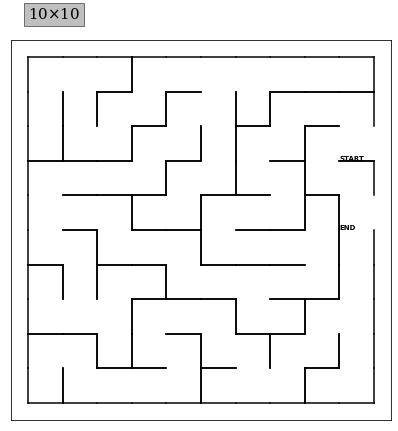

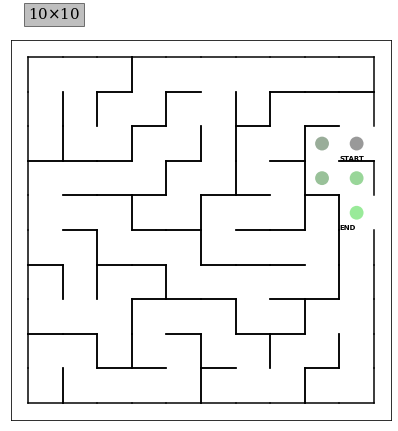

DEBUG:root:Class DepthFirstBacktracker ctor called
DEBUG:root:Class Solver ctor called
DEBUG:root:Class DepthFirstBacktracker solve called
DEBUG:root:Class DepthFirstBacktracker leaving solve



Generating the maze with depth-first search...
Number of moves performed: 149
Execution time for algorithm: 0.0000

Solving the maze with depth-first search...
Number of moves performed: 114
Execution time for algorithm: 0.0000


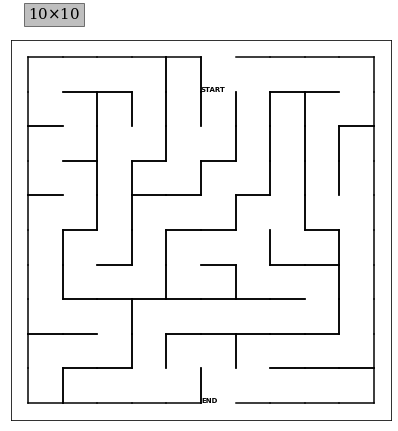

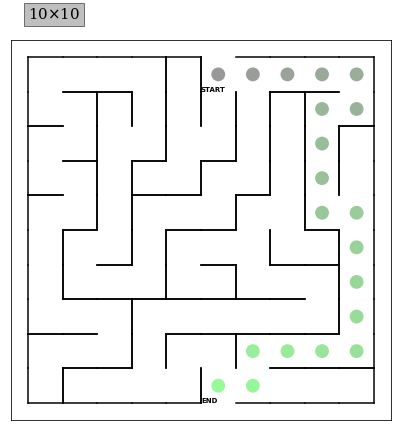

DEBUG:root:Class BiDirectional ctor called
DEBUG:root:Class Solver ctor called
DEBUG:root:Class BiDirectional solve called



Generating the maze with depth-first search...
Number of moves performed: 176
Execution time for algorithm: 0.0000

Solving the maze with bidirectional depth-first search...


KeyboardInterrupt: 

In [29]:
from __future__ import absolute_import


if __name__ == "__main__":

    # Crea una instancia de la clase principal 
    manager = MazeManager()
    # Crea un laberinto de 10x10
    maze = Maze(10,10,0)#aqui el código
    manager.add_existing_maze(maze)
    # Resuelve el laberinto usando el algoritmo Bi Directional, para esto deberás revisar los códigos anteriores para entender
    # como mandarlo a llamar
    manager.solve_maze(maze.id,"BiDirectional")#aqui el código

    # Para mostrar el laberinto generado
    manager.show_maze(maze.id)

    # Muestra la solución del laberinto Display the maze with the solution overlaid
    manager.show_solution(maze.id,cell_size=1)# aqui el código
    
    maze2 = Maze(10,10,1)
    manager.add_existing_maze(maze2)
    manager.solve_maze(maze2.id,"DepthFirstBacktracker")#aqui el código
    manager.show_maze(maze2.id)
    manager.show_solution(maze2.id,cell_size=1)
    
    maze3 = Maze(10,10,2)
    manager.add_existing_maze(maze3)
    manager.solve_maze(maze3.id,"BreadthFirst")#aqui el código
    manager.show_maze(maze3.id)
    manager.show_solution(maze3.id,cell_size=1)


In [ ]:
#aqui el código

